## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
!nvidia-smi

Mon Apr  1 11:09:50 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.67                 Driver Version: 390.67                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:0D:00.0 Off |                  N/A |
| 23%   26C    P8     8W / 250W |      0MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# Try to enable GPU (optional)


/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
train, test = keras.datasets.cifar10.load_data()

In [13]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x,flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
        x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)) * 2 - 1
        if not flatten:
            x = x.reshape(original_shape)
    return x

def preproc_y(y,num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [15]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [22]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp((x_train.shape[1],))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [26]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [27]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [28]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.7286 - acc: 0.3885 - val_loss: 1.5739 - val_acc: 0.4465
Epoch 2/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.4927 - acc: 0.4726 - val_loss: 1.4517 - val_acc: 0.4884
Epoch 3/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.3701 - acc: 0.5173 - val_loss: 1.4318 - val_acc: 0.4935
Epoch 4/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.2751 - acc: 0.5505 - val_loss: 1.3750 - val_acc: 0.5156
Epoch 5/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.1887 - acc: 0.5808 - val_loss: 1.3802 - val_acc: 0.5197
Epoch 6/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.1089 - acc: 0.6085 - val_loss: 1.3587 - val_acc: 0.5318
Epoch 7/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.0361 - acc: 0.6347 - val_loss: 1.3646 -

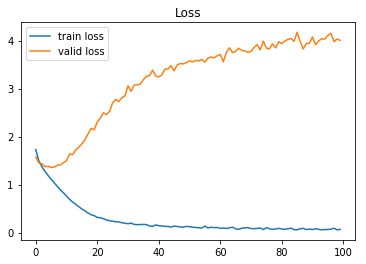

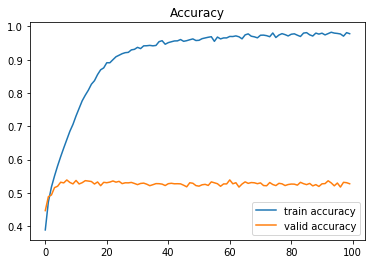

In [30]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

AttributeError: 'tuple' object has no attribute 'shape'